In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:

import pandas as pd  # For data manipulation and analysis
import numpy as np
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For advanced visualizations and styling
import plotly.express as px  # For interactive visualizations
df=pd.read_csv('/content/drive/MyDrive/user_behavior_dataset.csv')


In [5]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [6]:
df.sample(10)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
525,526,Samsung Galaxy S21,Android,224,4.5,1646,57,665,59,Male,3
612,613,Xiaomi Mi 11,Android,553,10.2,2911,82,2441,44,Male,5
548,549,Google Pixel 5,Android,383,6.6,2155,74,1360,45,Male,4
435,436,Xiaomi Mi 11,Android,105,3.4,798,21,467,34,Female,2
408,409,Samsung Galaxy S21,Android,357,7.8,2289,74,1242,22,Female,4
317,318,Google Pixel 5,Android,116,2.2,827,29,434,28,Female,2
306,307,OnePlus 9,Android,243,5.0,1232,47,877,43,Male,3
42,43,Samsung Galaxy S21,Android,120,2.1,720,39,392,43,Male,2
477,478,iPhone 12,iOS,258,4.2,1315,44,762,59,Female,3
314,315,iPhone 12,iOS,281,4.9,1566,59,632,29,Male,3


In [7]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [8]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In fact, the variables with high correlation with the User Behavior Class variable are directly revealed, except for the age feature, other features fit into a certain pattern, this is a good thing of course :)

In [11]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

no outiers found in the data .

In [12]:
import pandas as pd

# Define the function for outlier removal
def outlier_removal(dataframe, column):
    """
    Removes outliers from the specified column using the IQR method.
    """
    Q1 = dataframe[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = dataframe[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    # Filter the DataFrame to exclude outliers
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Copy the dataset
df_without_outlier = df.copy()

# List of columns to exclude from outlier removal
excluded_columns = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Age', 'Battery Drain (mAh/day)']

# Perform outlier removal for each numeric column, excluding specified ones
for col in df_without_outlier.select_dtypes(include=['number']).columns:
    if col not in excluded_columns:
        df_without_outlier = outlier_removal(df_without_outlier, col)

# Display the shape of the dataset after outlier removal
print(f"Original Shape: {df.shape}")
print(f"Shape After Outlier Removal: {df_without_outlier.shape}")


Original Shape: (700, 11)
Shape After Outlier Removal: (700, 11)


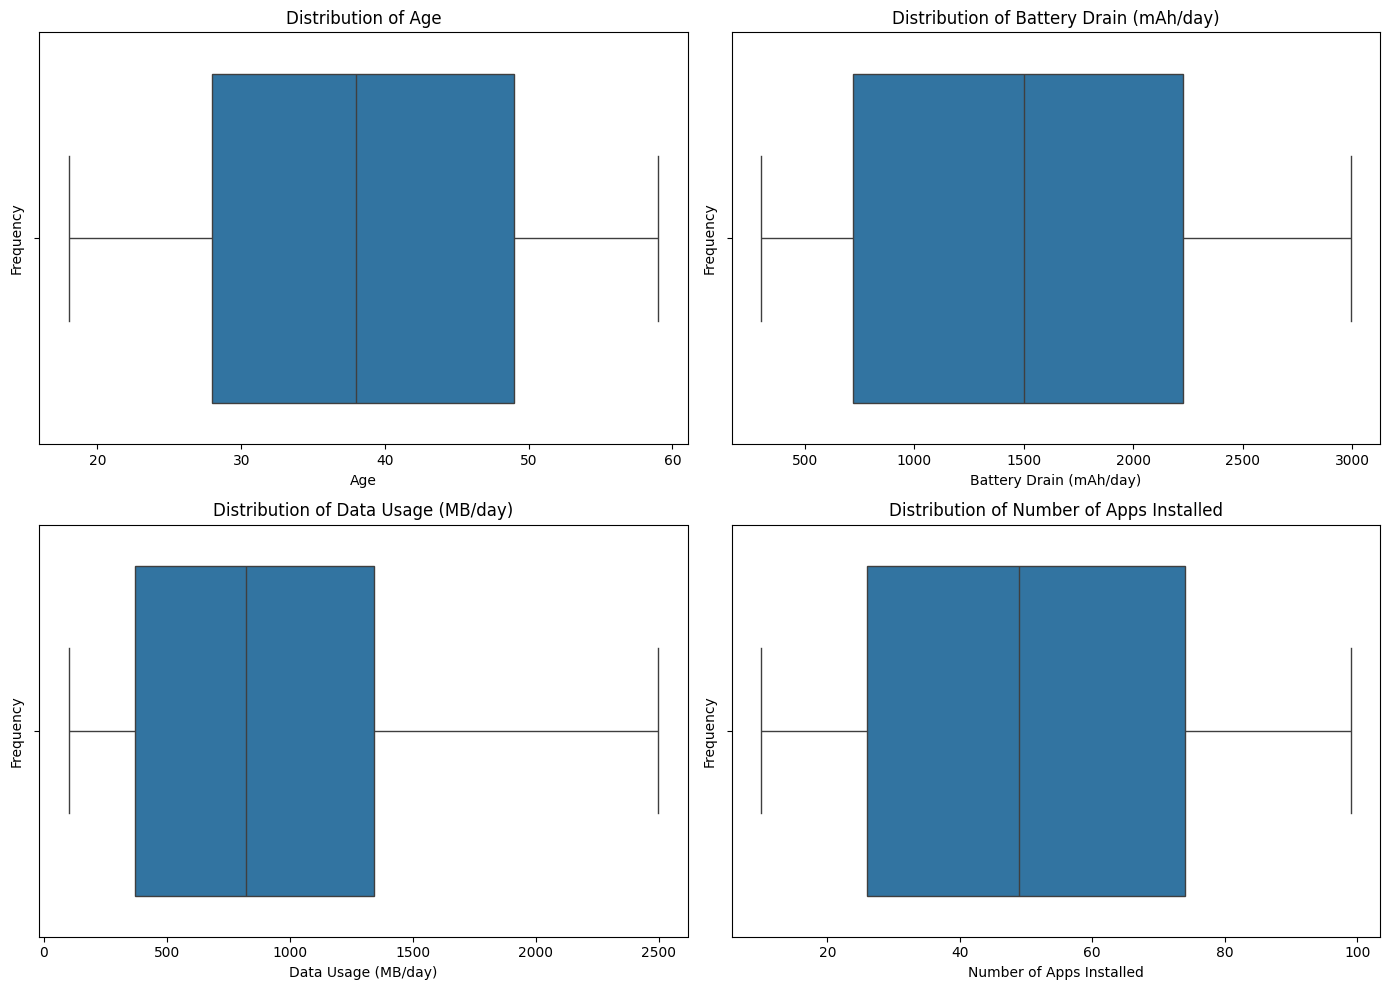

In [13]:
# Plot histograms for key variables to understand their distribution.
# Define features for visualization
features = ['Age','Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Number of Apps Installed']

# Plot boxplots for each feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **bold text**
Based on the analysis of the data presented in the diagram, we can draw several conclusions regarding mobile device user behavior:

User Age The majority of mobile device users in this dataset are between 20 and 60 years old. The average age of users is around 38 years, indicating that most users fall within the adult age group.

Daily Battery Usage Daily battery usage varies between 300 and 3000 mAh, with an average usage of around 1500 mAh. This suggests that most users consume a moderate amount of battery power each day, although some users consume more, possibly due to more intensive use of their devices.

Daily Data Usage Daily data usage by mobile device users ranges from 100 to 2500 MB, with an average usage of around 900 MB. This indicates that most users use a moderate amount of data, although there are users with higher data usage.

Number of Installed Applications The number of applications installed on users' devices ranges from 10 to 100 applications, with an average of around 50 applications. This indicates that the majority of users have a large number of installed applications, reflecting various needs and preferences in using mobile devices.


<ipython-input-14-51a9bfc05dd0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')
<ipython-input-14-51a9bfc05dd0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Device Model', palette='muted', order=df['Device Model'].value_counts().index)


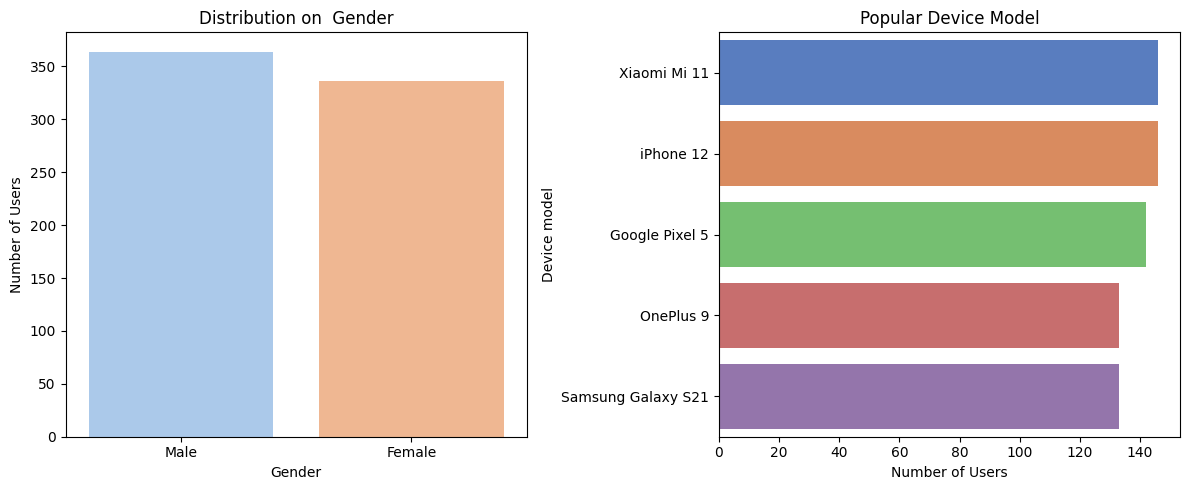

In [14]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Distribution on  Gender')
plt.ylabel('Number of Users')
plt.xlabel('Gender')

plt.subplot(1, 2, 2)
sns.countplot(data=df, y='Device Model', palette='muted', order=df['Device Model'].value_counts().index)
plt.title('Popular Device Model')
plt.ylabel('Device model')
plt.xlabel('Number of Users')

plt.tight_layout()
plt.show()

From the diagram above, we can conclude the following:

Gender Distribution of Users From the diagram, it can be seen that the number of male mobile device users is higher compared to female users. This indicates that the majority of users in this dataset are male, which may reflect preferences or usage habits of mobile devices among certain genders.

Popularity of Device Models Most mobile device users are using the Xiaomi Mi 11 and iPhone 12 models, each with approximately 140 users. These two models show high popularity among users, possibly influenced by factors such as quality, price, and features offered by the devices.

In [15]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

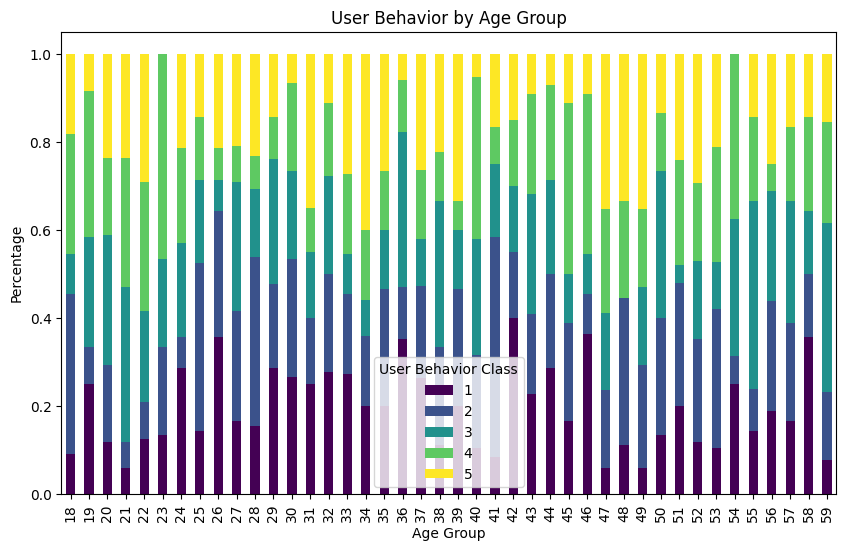

In [16]:
# Analyzing user behavior by age groups
df['age_group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 50, 100], labels=['<18', '18-25', '26-35', '36-50', '50+'])
age_behavior = df.groupby('Age')['User Behavior Class'].value_counts(normalize=True).unstack()
age_behavior.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('User Behavior by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.show()

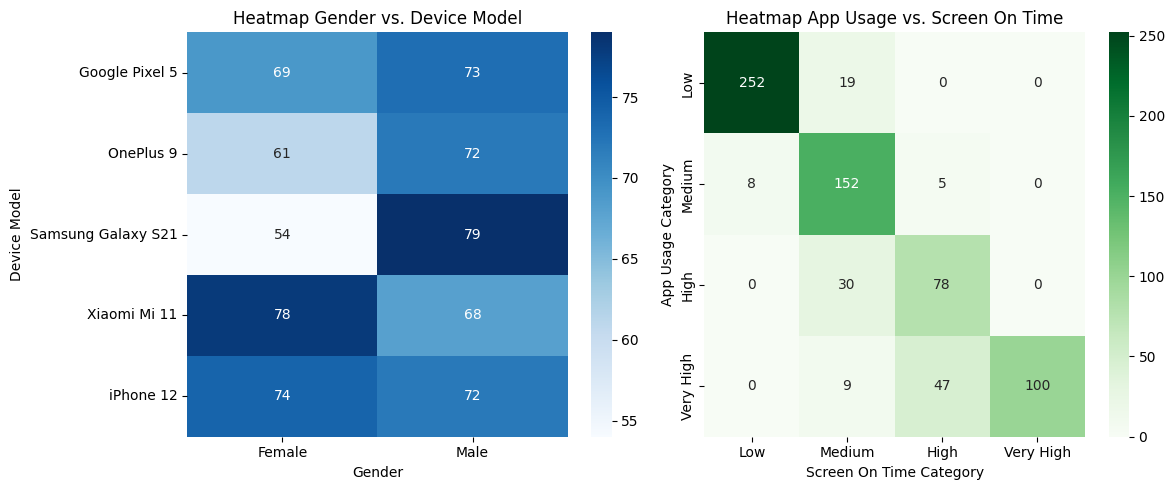

In [17]:
#Heatmap 1: Gender vs. Device Model
heatmap_data1 = pd.crosstab(df['Device Model'], df['Gender'])

# Heatmap 2: App Usage Time (dikelompokkan) vs. Screen On Time (dikelompokkan)
# Membuat kategori untuk App Usage Time dan Screen On Time
df['App Usage Category'] = pd.cut(df['App Usage Time (min/day)'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])
df['Screen On Time Category'] = pd.cut(df['Screen On Time (hours/day)'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

heatmap_data2 = pd.crosstab(df['App Usage Category'], df['Screen On Time Category'])

# Membuat plot
plt.figure(figsize=(12, 5))

# Subplot 1: Heatmap Gender vs. Device Model
plt.subplot(1, 2, 1)
sns.heatmap(heatmap_data1, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap Gender vs. Device Model')
plt.ylabel('Device Model')
plt.xlabel('Gender')

# Subplot 2: Heatmap App Usage vs. Screen On Time
plt.subplot(1, 2, 2)
sns.heatmap(heatmap_data2, annot=True, cmap='Greens', fmt='d')
plt.title('Heatmap App Usage vs. Screen On Time')
plt.ylabel('App Usage Category')
plt.xlabel('Screen On Time Category')

# Menyesuaikan tata letak
plt.tight_layout()

# Menampilkan plot
plt.show()

Based on the analysis of the heatmap, we can draw the following conclusions:

Gender Distribution Across Device Models:
The Samsung Galaxy S21 is predominantly used by male users, with 79 male users compared to fewer female users (54).
The Xiaomi Mi 11 is the most popular device among female users, suggesting a higher preference for this model among women.
The iPhone 12 shows a nearly equal distribution between male and female users, with 72 male users and 74 female users, indicating balanced popularity among both genders.
App Usage vs. Screen On Time:
Most users with low screen on time also have low app usage, with a total of 252 users falling into this category. A small number of users with low screen on time show medium app usage, indicating that while many users spend little time on their devices, a few still engage with apps moderately.
For users with medium screen on time, medium app usage is the most common pattern, with 152 users in this group, showing a moderate level of device engagement.
Among users with high screen on time, there is a trend of high app usage, with 78 users fitting into this category, indicating a strong correlation between screen time and app usage for more engaged users.
Users with very high screen on time typically exhibit very high app usage, with 100 users showing this pattern, reflecting high device engagement in both time and app usage.


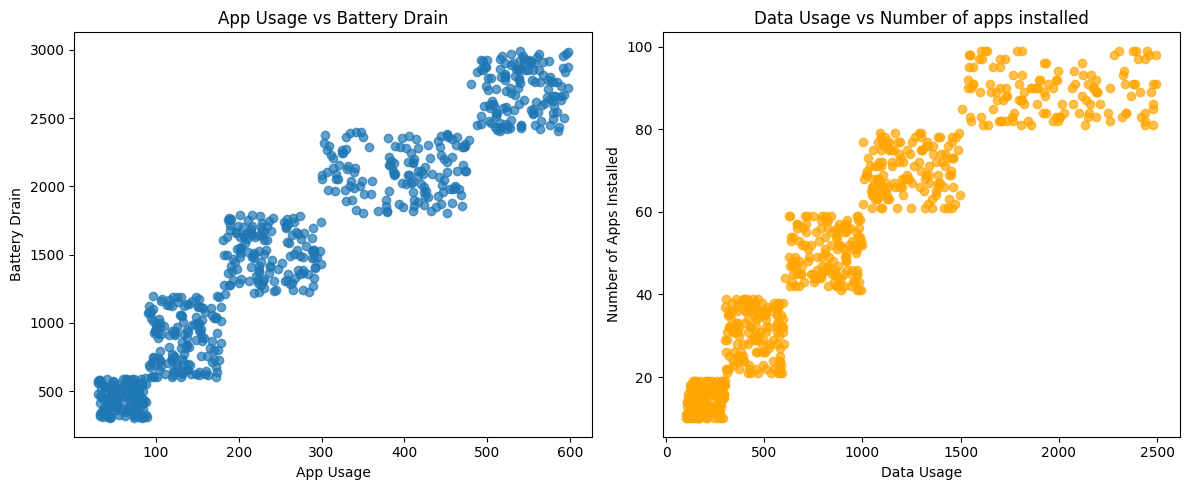

In [18]:
plt.figure(figsize=(12, 5))

# App Usage vs Battery Drain
plt.subplot(1, 2, 1)
plt.scatter(df['App Usage Time (min/day)'], df['Battery Drain (mAh/day)'], alpha=0.7)
plt.title('App Usage vs Battery Drain')
plt.xlabel('App Usage')
plt.ylabel('Battery Drain')

# Data Usage vs Number of apps installed
plt.subplot(1, 2, 2)
plt.scatter(df['Data Usage (MB/day)'], df['Number of Apps Installed'], alpha=0.7, color='orange')
plt.title('Data Usage vs Number of apps installed')
plt.xlabel('Data Usage')
plt.ylabel('Number of Apps Installed')

plt.tight_layout()
plt.show()

Based on the scatter plots in the image, the following relationships can be observed:

App Usage vs. Battery Drain: There is a strong positive correlation between app usage and battery drain. As the amount of app usage increases, the battery drain also increases. This is expected, as using apps for extended periods typically consumes more power from the device's battery. The data suggests that users who spend more time using apps tend to experience higher battery consumption.
Data Usage vs. Number of Apps Installed (Right Plot): Similarly, there is a positive correlation between data usage and the number of apps installed. As the number of apps installed increases, so does the amount of data usage. This relationship implies that users with more apps on their devices may engage in more online activities, which leads to higher data consumption.
Conclusion
User Behavior Based on Device Type: Samsung Galaxy S21 users are predominantly male, while female users are more inclined to use the Xiaomi Mi 11. iPhone 12 users tend to be balanced between males and females.
Relationship Between Screen Time and App Usage: The correlation between screen time and app usage shows that users with low screen time generally have low app usage, and conversely, users with high screen time have high app usage.
App Usage and Battery Drain: There is a strong positive correlation between app usage and battery drain, indicating that the longer the app usage, the more battery power is consumed.
Data Usage and Number of Installed Apps:There is a positive correlation between data usage and the number of installed apps, showing that the more apps installed on a device, the more data is used.ata is used.

In [19]:
capacity = {'Google Pixel 5': 4080, 'OnePlus 9': 4500,
            'Xiaomi Mi 11': 4600, 'iPhone 12': 2815, 'Samsung Galaxy S21':4000}


df['capacity'] = df['Device Model'].apply(lambda x: capacity[x] if x in capacity else 'NaN')
df['avg_power_consumption'] = df['Battery Drain (mAh/day)']/df['Screen On Time (hours/day)']

df['Battery_life'] = df['capacity']/df['avg_power_consumption']
df[df['Battery_life'] < df['Screen On Time (hours/day)']]
df['cycle_number_per_day'] = df['Battery Drain (mAh/day)']/df['capacity']

df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,age_group,App Usage Category,Screen On Time Category,capacity,avg_power_consumption,Battery_life,cycle_number_per_day
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,36-50,High,Medium,4080,292.500000,13.948718,0.458824
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,36-50,Medium,Medium,4500,283.191489,15.890308,0.295778
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,36-50,Low,Medium,4600,190.250000,24.178712,0.165435
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,18-25,Medium,Medium,4080,349.166667,11.684964,0.410784
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,26-35,Medium,Medium,2815,317.906977,8.854792,0.485613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2,18-25,Low,Medium,2815,277.435897,10.146488,0.384369
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4,50+,High,High,4600,288.970588,15.918575,0.427174
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2,36-50,Low,Low,4080,303.870968,13.426752,0.230882
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1,36-50,Low,Low,4000,253.529412,15.777262,0.107750


In [20]:
df['cycle_number_in_400days'] = df['cycle_number_per_day']* 400

The above part comes from a research that has been used a lot in studies on this notebook, I am adding it because I find it interesting.


In [21]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class',
       'age_group', 'App Usage Category', 'Screen On Time Category',
       'capacity', 'avg_power_consumption', 'Battery_life',
       'cycle_number_per_day', 'cycle_number_in_400days'],
      dtype='object')

Let's Try to Derive New Features¶
For example, we can determine the relationship between screen time and battery drain by dividing the two. This way, we can see how much battery is consumed while the screen is on.

If we learn the battery capacity of each phone model, and then obtain the average battery consumption, we can estimate how many hours the phone will stay on. Of course, we will consider how much the battery is drained each hour the screen is on, which will cause it to look like the battery consumption is the same every hour the screen is on. This is an assumption, of course, and it might be reconsidered, but it doesn't seem that important.

Since we have the battery capacity and battery consumption values, we can also find out how many times the battery will drain in a full day.

In [22]:
df.columns


Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class',
       'age_group', 'App Usage Category', 'Screen On Time Category',
       'capacity', 'avg_power_consumption', 'Battery_life',
       'cycle_number_per_day', 'cycle_number_in_400days'],
      dtype='object')

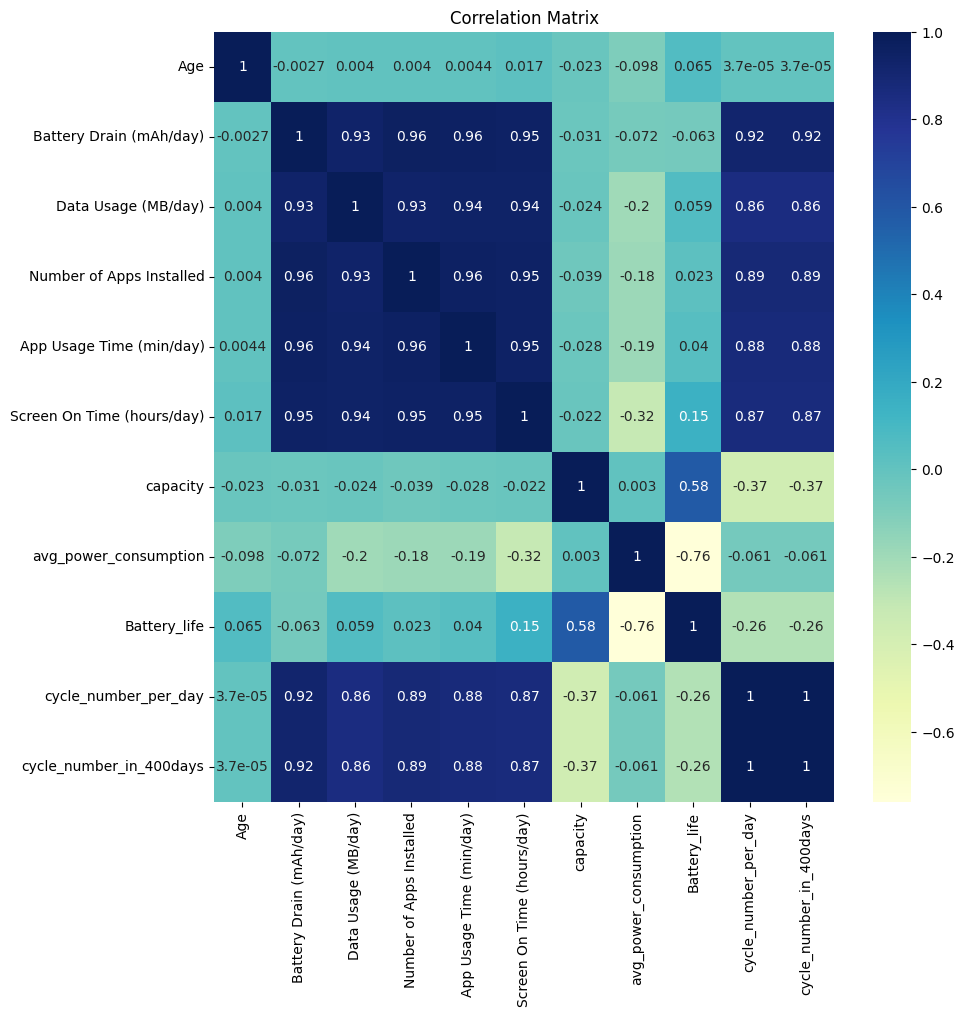

In [23]:
# Select only numeric columns explicitly, excluding the potential problem columns
df_num = df[['Age', 'Battery Drain (mAh/day)', 'Data Usage (MB/day)', 'Number of Apps Installed',
            'App Usage Time (min/day)', 'Screen On Time (hours/day)','capacity','avg_power_consumption','Battery_life', 'cycle_number_per_day',
       'cycle_number_in_400days']]

# Plot a heatmap for the correlation matrix
plt.figure(figsize=(10,10))  # Set figure size
sns.heatmap(df_num.corr(), cmap="YlGnBu", annot=True) # Heatmap with annotations
plt.title("Correlation Matrix")
plt.show()

The following part comes from a research that has been used a lot in studies on this notebook, I am adding it because I find it interesting.


# *Classification / Model *

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder #

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import RandomizedSearchCV

MOdel TRaining

In [48]:
def evaluate_classification(model, test_features, test_labels):

    predictions = model.predict(test_features)  # Get the model's predictions

   # We calculate performance.
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions, average='weighted')  # Class balance for Weighted
    recall = recall_score(test_labels, predictions, average='weighted')
    f1 = f1_score(test_labels, predictions, average='weighted')

    print(f"\nModel Performance for {type(model).__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    # could also return all scores in a dictionary, but my purpose is just to write.
    return accuracy

In [45]:
def log_transform(X):
    return np.log(X + 1e-9)
def square_root(X):
    return np.sqrt(X)

cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(drop="first", handle_unknown="ignore"))
log_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             FunctionTransformer(log_transform, feature_names_out="one-to-one"),
                             StandardScaler())
square_root_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     FunctionTransformer(square_root, feature_names_out="one-to-one"),
                                     StandardScaler())
# Change here: Use 'most_frequent' for the default numerical pipeline to handle 'age_group'
default_num_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
    ("drop_columns", "drop", ["User ID"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include = object)),
    ("log", log_pipeline, ["Screen On Time (hours/day)", "Battery Drain (mAh/day)", "Data Usage (MB/day)"]),
    ("sqrt", square_root_pipeline, ["App Usage Time (min/day)"]),
],
    remainder=default_num_pipeline) # Apply this pipeline to remaining numerical columns including age_group

In [51]:
#If you remove user_behavior_class from the cat_cols list
# Actually, there is not much need for the code below, but it should be a standard procedure.
X = df.drop(columns = ["User Behavior Class"] , axis = 1)
y = df["User Behavior Class"]

2. Pipeline:

The Pipeline function combines multiple data processing steps into a single, unified process. In your code, it combines the data preprocessing step defined by the ColumnTransformer with the classifier of your choice to create a machine learning model.

steps parameter: This defines a list where steps are added in sequence.

In the first step ("preprocessor", preprocessor):

"preprocessor": A name for this step.

preprocessor: The ColumnTransformer object defined earlier.

In the second step ("classifier", clf):

"classifier": A name for this step.

clf: Represents the classifier you select from the classifiers dictionary (e.g., RandomForestClassifier).

The Pipeline first preprocesses the data using the ColumnTransformer and then trains the classifier to make predictions. This approach makes your code more organized and readable.

Summary:

ColumnTransformer allows you to apply different preprocessing steps based on data types.

Pipeline integrates multiple preprocessing and modeling steps into a single streamlined process, keeping your code cleaner and easier to manage.

#

In [52]:
# If you remove user_behavior_class from the cat_cols list
# the code below is not really needed, but let it be a standard procedure.
cat_cols = X.select_dtypes(include=['object']).columns.values
num_cols = X.select_dtypes(include=np.number).columns.tolist()

Applying Standard Scaler for numerical data and OneHotEncoder for categorical data

1. ColumnTransformer:

The ColumnTransformer is used to apply different preprocessing steps to columns with different data types.

transformers parameter: This defines a list where each element specifies which transformation to apply to which columns.
In the first element ("num", StandardScaler(), num_cols):

"num": This is a name given to the transformer for identification.

StandardScaler(): Scales numerical columns (num_cols) so that they have a mean of 0 and a variance of 1.

num_cols: Specifies the columns to which the transformer will be applied (numerical columns).

In the second element ("cat", OneHotEncoder(drop='first'), cat_cols):

"cat": This is a name given to the transformer for identification.

OneHotEncoder(drop='first'): Transforms categorical columns (cat_cols) using one-hot encoding. The drop='first' parameter drops the first category, reducing dimensionality.

cat_cols: Specifies the columns to which the transformer will be applied (categorical columns).



In [53]:
# Data Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ])

In [54]:
# Models

classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=200),
    'SVM': SVC(),
    'DecisionTree': DecisionTreeClassifier(),
    'KNeighbors': KNeighborsClassifier()}

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

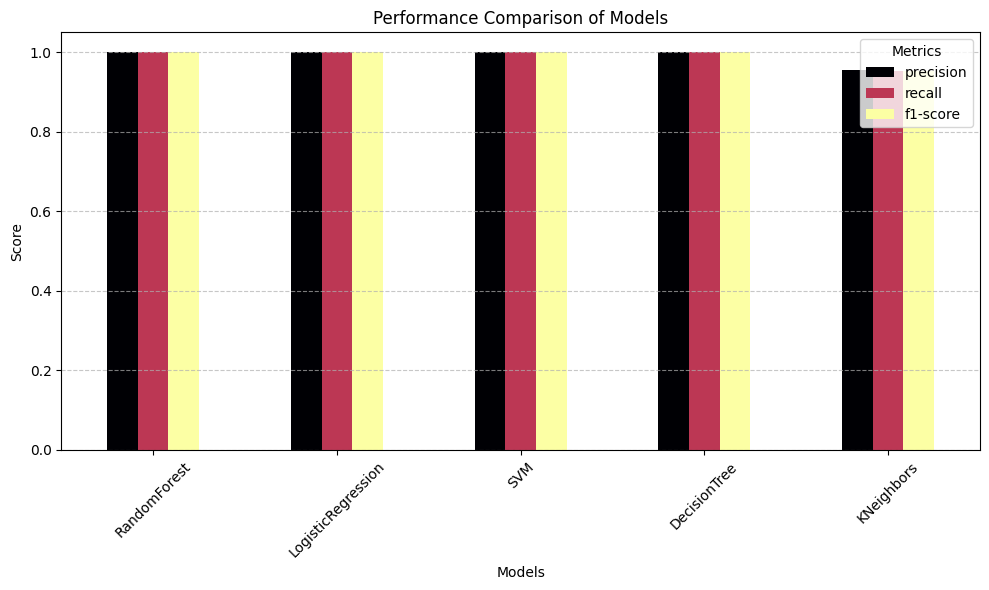

                    precision   recall  f1-score
RandomForest         1.000000  1.00000  1.000000
LogisticRegression   1.000000  1.00000  1.000000
SVM                  1.000000  1.00000  1.000000
DecisionTree         1.000000  1.00000  1.000000
KNeighbors           0.954493  0.95388  0.952621


In [58]:
# Model Training and Model evaluation

# Sonuçları kaydetmek için sözlük oluşturuyoruz.
scores = {'precision': {}, 'recall': {}, 'f1-score': {}}

for name, clf in classifiers.items():
    model = Pipeline(
        steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Test
    report = classification_report(y_test, y_pred, output_dict=True)

    # Macro avg değerlerini kaydet
    scores['precision'][name] = report['macro avg']['precision']
    scores['recall'][name] = report['macro avg']['recall']
    scores['f1-score'][name] = report['macro avg']['f1-score']



    # Sözlüğü DataFrame'e dönüştür
    scores_df = pd.DataFrame(scores)



# Bar Grafik Çizimi
scores_df.plot(kind='bar', figsize=(10, 6), colormap='inferno')# Germany:)
plt.title("Performance Comparison of Models")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=45)

plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(scores_df)

In [30]:
# Pipeline oluştur: first preprocessing, then modeling
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42))])
# The values I want to be checked, usually this part is done with ChatGPT :)

param_distributions = {

    'classifier__n_estimators': [50, 100, 200, 300],  # Parameter for the "classifier" step in Pipeline, # Number of trees
    'classifier__max_depth': [None, 10, 20, 30, 50], # Minimum sample for branching
    'classifier__min_samples_split': [2, 5, 10], #
    'classifier__min_samples_leaf': [1, 2, 4],           # Minimum sample on leaf
    'classifier__bootstrap': [True, False]                # Bootstrap sampling
}



# Creating RondomSearch object
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=50,  #Trying 50 random combinations
    scoring='accuracy', ##measures results with the accuracy metric.
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1)


random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               StandardScaler(),
                                                                               ['User '
                                                                                'ID',
                                                                                'App '
                                                                                'Usage '
                                                                                'Time '
                                                                                '(min/day)',
                                                                                'Screen '
                                                                                'On '
                                                                                'Time '
                                                                                '(hours/day)',
                                                                                'Battery '
                                                                                'Drain '
                                                                                '(mAh/day)',
                                                                                'Number '
                                                                                'of '
                                                                                'Apps '
                                                                                'Installed',
                                                                                'Data '
                                                                                'Usage '
                                                                                '(MB/day)',
                                                                                'Age',
                                                                                'capacity',
                                                                                'avg_power_consumption',
                                                                                'Battery_life',
                                                                                'cycle_number_pe...
                                                                               array(['Device Model', 'Operating System', 'Gender'], dtype=object))])),
                                             ('classifier',
                                              RandomForestClassifier(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__max_depth': [None, 10, 20,
                                                                  30, 50],
                                        'classifier__min_samples_leaf': [1, 2,
                                                                         4],
                                        'classifier__min_samples_split': [2, 5,
                                                                          10],
                                        'classifier__n_estimators': [50, 100,
                                                                     200,
                                                                     300]},
                   random_state=42, scoring='accuracy', verbose=2)

**Best parameters**

**
Model Performance for Pipeline**

In [31]:
# Best parameters
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'classifier__n_estimators': 50, 'classifier__min_samples_split': 10, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 10, 'classifier__bootstrap': False}
